# Week 2-1

## Contents of Today's Lecture

### - Pandas DataFrame (sorting, subsetting, generating new columns)

In [1]:
#head(): returns the first few rows.
#info(): shows information on each of the columns, such as the data type.
#shape: returns the number of rows and columns of the DataFrame.
#describe(): calculates a few summary statistics for each column.

In [2]:
import os

In [3]:
os.getcwd()

'/Users/taohidshadat/PythonStuff/CIS4120'

In [4]:
os.chdir('/Users/taohidshadat/Downloads')

In [5]:
os.getcwd()

'/Users/taohidshadat/Downloads'

In [6]:
import pandas as pd 

#import the data.
file= "homelessness_no_index.csv"
data = pd.read_csv(file) 
data=pd.DataFrame(data)

# Print the head of the data.
data.head()

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570,864,4887681
1,Pacific,Alaska,1434,582,735139
2,Mountain,Arizona,7259,2606,7158024
3,West South Central,Arkansas,2280,432,3009733
4,Pacific,California,109008,20964,39461588


In [7]:
#individual: the number of homeless individuals not part of a family with children. 
#family_members: the number of homeless individuals part of a family with children. 
#state_pop: the state's total population.

In [8]:
# Print information about the data.
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   region          51 non-null     object
 1   state           51 non-null     object
 2   individuals     51 non-null     int64 
 3   family_members  51 non-null     int64 
 4   state_pop       51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None


In [9]:
# Print the shape.
print(data.shape)

# Print a description.
print (data.describe())

(51, 5)
         individuals  family_members     state_pop
count      51.000000       51.000000  5.100000e+01
mean     7225.784314     3504.882353  6.405637e+06
std     15991.025083     7805.411811  7.327258e+06
min       434.000000       75.000000  5.776010e+05
25%      1446.500000      592.000000  1.777414e+06
50%      3082.000000     1482.000000  4.461153e+06
75%      6781.500000     3196.000000  7.340946e+06
max    109008.000000    52070.000000  3.946159e+07


In [10]:
#columns: An index of columns: the column names.
#index: An index for the rows: either row numbers or row names.

In [11]:
# Print the column index.
print (data.columns.values)

# Print the row index.
print (data.index)

['region' 'state' 'individuals' 'family_members' 'state_pop']
RangeIndex(start=0, stop=51, step=1)


In [12]:
#sort_values(): change the order of the rows.
#on a single col: df.sort_values("col A")
#on multiple cols: df.sort_values(["col A","col B"])

In [13]:
# Sort the data by individuals.
data_sorted = data.sort_values("individuals")

# Print the top 7 rows.
print(data_sorted.head(7))

                region          state  individuals  family_members  state_pop
50            Mountain        Wyoming          434             205     577601
34  West North Central   North Dakota          467              75     758080
7       South Atlantic       Delaware          708             374     965479
39         New England   Rhode Island          747             354    1058287
45         New England        Vermont          780             511     624358
29         New England  New Hampshire          835             615    1353465
41  West North Central   South Dakota          836             323     878698


In [14]:
# Sort data by descending individuals.
data_sorted_v2 = data.sort_values("individuals", ascending=False)

# Print the top 7 rows.
print(data_sorted_v2.head(7))

                region         state  individuals  family_members  state_pop
4              Pacific    California       109008           20964   39461588
32        Mid-Atlantic      New York        39827           52070   19530351
9       South Atlantic       Florida        21443            9587   21244317
43  West South Central         Texas        19199            6111   28628666
47             Pacific    Washington        16424            5880    7523869
37             Pacific        Oregon        11139            3337    4181886
38        Mid-Atlantic  Pennsylvania         8163            5349   12800922


In [15]:
# Sort data by region, then descending family members.
data_sorted_v3 = data.sort_values(["region", "family_members"], ascending=[True, False])

# Print the top 7 rows.
print(data_sorted_v3.head(7))

                region      state  individuals  family_members  state_pop
13  East North Central   Illinois         6752            3891   12723071
35  East North Central       Ohio         6929            3320   11676341
22  East North Central   Michigan         5209            3142    9984072
49  East North Central  Wisconsin         2740            2167    5807406
14  East North Central    Indiana         3776            1482    6695497
42  East South Central  Tennessee         6139            1744    6771631
17  East South Central   Kentucky         2735             953    4461153


In [16]:
#Subsetting columns or rows.

In [17]:
# Select the state and family_members columns
sub_data = data[["state","family_members"]]

# Print the head of the result
print (sub_data.head(7))

         state  family_members
0      Alabama             864
1       Alaska             582
2      Arizona            2606
3     Arkansas             432
4   California           20964
5     Colorado            3250
6  Connecticut            1696


In [18]:
# Filter for rows where individuals is greater than 10000
output_1 = data[data["individuals"]>10000]
print(output_1)
print ()
print ()
# Filter for rows where region is Mountain
output_2 = data[data["region"]=="Mountain"]
print (output_2)
print ()
print ()
# Filter for rows where family_members is less than 1000 and region is Pacific
output_3 = data[(data["family_members"]<1000) & (data["region"]=="Pacific")]
print(output_3)

                region       state  individuals  family_members  state_pop
4              Pacific  California       109008           20964   39461588
9       South Atlantic     Florida        21443            9587   21244317
32        Mid-Atlantic    New York        39827           52070   19530351
37             Pacific      Oregon        11139            3337    4181886
43  West South Central       Texas        19199            6111   28628666
47             Pacific  Washington        16424            5880    7523869


      region       state  individuals  family_members  state_pop
2   Mountain     Arizona         7259            2606    7158024
5   Mountain    Colorado         7607            3250    5691287
12  Mountain       Idaho         1297             715    1750536
26  Mountain     Montana          983             422    1060665
28  Mountain      Nevada         7058             486    3027341
31  Mountain  New Mexico         1949             602    2092741
44  Mountain      

In [19]:
# CA, NV
ca_nv = ["California", "Nevada"]

# Filter for rows in the CA, NV states (subsetting rows in CA or NV)
data111 = data[data["state"].isin(ca_nv)]  #instead of using or multiple times

# See the result
print(data111)

      region       state  individuals  family_members  state_pop
4    Pacific  California       109008           20964   39461588
28  Mountain      Nevada         7058             486    3027341


In [20]:
#adding new columns.

In [21]:
# Add total col as sum of individuals and family_members.
data["total"] = data["individuals"] + data["family_members"]

# Add portion_individuals col as proportion of total that are individuals.
data["p_individuals"] = data["individuals"] / data["total"]

# See the result
print (data.head(7))

               region        state  individuals  family_members  state_pop  \
0  East South Central      Alabama         2570             864    4887681   
1             Pacific       Alaska         1434             582     735139   
2            Mountain      Arizona         7259            2606    7158024   
3  West South Central     Arkansas         2280             432    3009733   
4             Pacific   California       109008           20964   39461588   
5            Mountain     Colorado         7607            3250    5691287   
6         New England  Connecticut         2280            1696    3571520   

    total  p_individuals  
0    3434       0.748398  
1    2016       0.711310  
2    9865       0.735834  
3    2712       0.840708  
4  129972       0.838704  
5   10857       0.700654  
6    3976       0.573441  


### - Aggregate Data (summry statistics, counting, grouping)

In [22]:
import pandas as pd 

#import the data.
file="supermarket_no_index.csv"
market = pd.read_csv(file) 
market=pd.DataFrame(market)

# Print the head of the data.
print(market.head())

   store type  department      date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1  2/5/2010      24924.50       False       5.727778   
1      1    A           1  3/5/2010      21827.90       False       8.055556   
2      1    A           1  4/2/2010      57258.43       False      16.816667   
3      1    A           1  5/7/2010      17413.94       False      22.527778   
4      1    A           1  6/4/2010      17558.09       False      27.050000   

   fuel_price_usd_per_l  unemployment  
0              0.679451         8.106  
1              0.693452         8.106  
2              0.718284         7.808  
3              0.748928         7.808  
4              0.714586         7.808  


In [23]:
# Print the mean of weekly_sales
print(market["weekly_sales"].mean())

# Print the median of weekly_sales
print(market["weekly_sales"].median())

# Print the maximum of the date column
print (market["date"].max())

# Print the minimum of the date column
print (market["date"].min())

23843.950148505668
12049.064999999999
9/9/2011
1/13/2012


In [24]:
#subset the rows which contains the sales data for department 1 of store 1.
market_subset = market[(market["department"]==1) & (market["store"]==1)]

In [25]:
# Sort market_subset by date
market_subset = market_subset.sort_values("date")
print (market_subset)

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
market_subset["cum_weekly_sales"] = market_subset["weekly_sales"].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
market_subset["cum_max_sales"] = market_subset["weekly_sales"].cummax()
print ()
# See the columns you calculated
print(market_subset[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

    store type  department       date  weekly_sales  is_holiday  \
11      1    A           1   1/7/2011      15984.24       False   
8       1    A           1  10/1/2010      20094.19       False   
9       1    A           1  11/5/2010      34238.88       False   
10      1    A           1  12/3/2010      22517.56       False   
0       1    A           1   2/5/2010      24924.50       False   
1       1    A           1   3/5/2010      21827.90       False   
2       1    A           1   4/2/2010      57258.43       False   
3       1    A           1   5/7/2010      17413.94       False   
4       1    A           1   6/4/2010      17558.09       False   
5       1    A           1   7/2/2010      16333.14       False   
6       1    A           1   8/6/2010      17508.41       False   
7       1    A           1   9/3/2010      16241.78       False   

    temperature_c  fuel_price_usd_per_l  unemployment  
11       9.038889              0.786176         7.742  
8       22.16111

In [26]:
#drop_duplicates()

# Drop duplicate store/type combinations
store_types = market.drop_duplicates(["store","type"])
print(store_types)
print ()
print ()
# Drop duplicate store/department combinations
store_depts = market.drop_duplicates(["store","department"])
print(store_depts.head())

      store type  department      date  weekly_sales  is_holiday  \
0         1    A           1  2/5/2010      24924.50       False   
901       2    A           1  2/5/2010      35034.06       False   
1798      4    A           1  2/5/2010      38724.42       False   
2699      6    A           1  2/5/2010      25619.00       False   
3593     10    B           1  2/5/2010      40212.84       False   
4495     13    A           1  2/5/2010      46761.90       False   
5408     14    A           1  2/5/2010      32842.31       False   
6293     19    A           1  2/5/2010      21500.58       False   
7199     20    A           1  2/5/2010      46021.21       False   
8109     27    A           1  2/5/2010      32313.79       False   
9009     31    A           1  2/5/2010      18187.71       False   
9899     39    A           1  2/5/2010      21244.50       False   

      temperature_c  fuel_price_usd_per_l  unemployment  
0          5.727778              0.679451         8.106  

In [27]:
#value_counts()

# Count the number of stores of each type
store_counts = store_types["type"].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types["type"].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort the counts in descending order.
dept_counts_sorted = store_depts["department"].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort the counts in descending order.
dept_props_sorted = store_depts["department"].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    11
B     1
Name: type, dtype: int64
A    0.916667
B    0.083333
Name: type, dtype: float64
1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64
1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


In [28]:
#3 types of stores: "supercenters," "discount stores," and "neighborhood markets
#encoded as A, B, and C

# Calc total weekly sales
sales_all = market["weekly_sales"].sum()
print (sales_all)

# Subset for type A stores, calc total weekly sales
sales_A = market[market["type"] == "A"]["weekly_sales"].sum()
print (sales_A)

# Subset for type B stores, calc total weekly sales
sales_B = market[market["type"] == "B"]["weekly_sales"].sum()
print (sales_B)

# Subset for type C stores, calc total weekly sales
sales_C = market[market["type"] == "C"]["weekly_sales"].sum()
print (sales_C)

# Get proportion for each type
sales_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_by_type)

256894718.89999998
233716315.01
23178403.89
0.0
[0.9097747 0.0902253 0.       ]


In [29]:
#groupby()

# Group by type; calculate total weekly sales
sales_by_type = market.groupby("type")["weekly_sales"].sum()
print (sales_by_type)
print ()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)

type
A    2.337163e+08
B    2.317840e+07
Name: weekly_sales, dtype: float64

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64


In [30]:
#Subsetting by row & column number: use iloc[]

#going back to the homelessness data.
file="homelessness_no_index.csv"
data = pd.read_csv(file) 
data=pd.DataFrame(data)

# Print the head of the data.
print(data.head())
print ()

# Get 23rd row, 2nd column.
print("Get 23rd row, 2nd column:",data.iloc[22, 1])
print ()

# Use slicing to get the first 5 rows (for all the columns)
print(data.iloc[:5, :])

# Use slicing to get columns 3 to 4
print(data.iloc[:, 2:4])

# Use slicing in both directions at once
print(data.iloc[:5, 2:4])

               region       state  individuals  family_members  state_pop
0  East South Central     Alabama         2570             864    4887681
1             Pacific      Alaska         1434             582     735139
2            Mountain     Arizona         7259            2606    7158024
3  West South Central    Arkansas         2280             432    3009733
4             Pacific  California       109008           20964   39461588

Get 23rd row, 2nd column: Michigan

               region       state  individuals  family_members  state_pop
0  East South Central     Alabama         2570             864    4887681
1             Pacific      Alaska         1434             582     735139
2            Mountain     Arizona         7259            2606    7158024
3  West South Central    Arkansas         2280             432    3009733
4             Pacific  California       109008           20964   39461588
    individuals  family_members
0          2570             864
1          

### - Visualizing Data & Reading Data into DataFrame

In [31]:
import pickle
with open('avoplotto.pkl', 'rb') as f:
    avo = pickle.load(f)

# Print the head of the data.
print(avo.head())
print (avo.shape)
print(avo["type"].unique())
print(avo["size"].unique())

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56
(1014, 6)
['conventional' 'organic']
['small' 'large' 'extra_large']


In [32]:
# Import matplotlib
import matplotlib.pyplot as plt

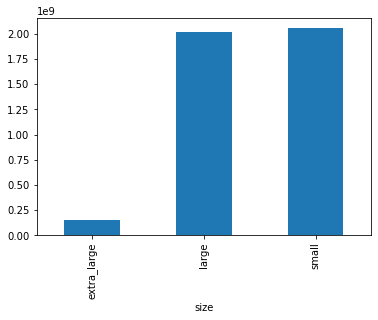

In [33]:
#Bar Plot: numerical calculations for a categorical variable (for each category type) 

# Get the total number of avocados sold of each size
nb_sold_by_size = avo.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

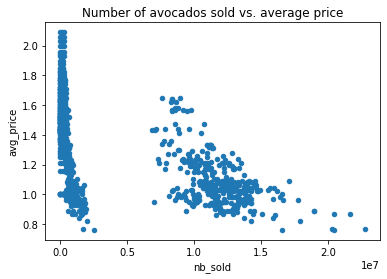

In [34]:
#Scatter Plot: relationship between two numerical variables.

# Scatter plot of avg_price vs. nb_sold.
avo.plot(x="nb_sold", y="avg_price", kind="scatter", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()

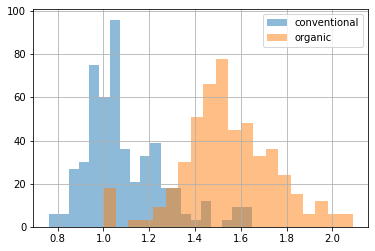

In [35]:
#Overalying Plots: good for group comparison?

# Histogram of conventional avg_price 
avo[avo["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Histogram of organic avg_price
avo[avo["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

In [36]:
#missing values (N/A, NaN)

print (avo.shape)

# Remove rows with missing values
avo_no_missing = avo.dropna()
print (avo_no_missing.shape)

# Check if any columns contain missing values
print(avo_no_missing.isna().any())

##How to deal with missing values?
#drop them.
#fill in with a certain number (e.g. average value from that column)
#linear interpolation.

(1014, 6)
(1014, 6)
date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


## In-Class Activity

In [37]:
import pandas as pd 

#import the data.
file="supermarket_no_index.csv"
market = pd.read_csv(file) 
market=pd.DataFrame(market)

# print a few rows.
print(market.head())
#how many rows and cols?
print(market.shape)
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# groupy by type and holiday_dummy and calculate the total number of sales.
print(market.groupby(['type', 'is_holiday'])['weekly_sales'].sum())

   store type  department      date  weekly_sales  is_holiday  temperature_c  \
0      1    A           1  2/5/2010      24924.50       False       5.727778   
1      1    A           1  3/5/2010      21827.90       False       8.055556   
2      1    A           1  4/2/2010      57258.43       False      16.816667   
3      1    A           1  5/7/2010      17413.94       False      22.527778   
4      1    A           1  6/4/2010      17558.09       False      27.050000   

   fuel_price_usd_per_l  unemployment  
0              0.679451         8.106  
1              0.693452         8.106  
2              0.718284         7.808  
3              0.748928         7.808  
4              0.714586         7.808  
(10774, 9)
type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56
(1014, 6)
date
2015-01-04    27279606.03
2015-01-11    25081927.33
2015-01-18    24961540.48
2015-01-25    24094678.66
2015-02-01    39838734.08
                 ...     
2018-02-25    25434002.74
2018-03-04    26834303.05
2018-03-11    26094044.41
2018-03-18    26030618.97
2018-03-25    27480242.92
Name: nb_sold, Length: 169, dtype: float64


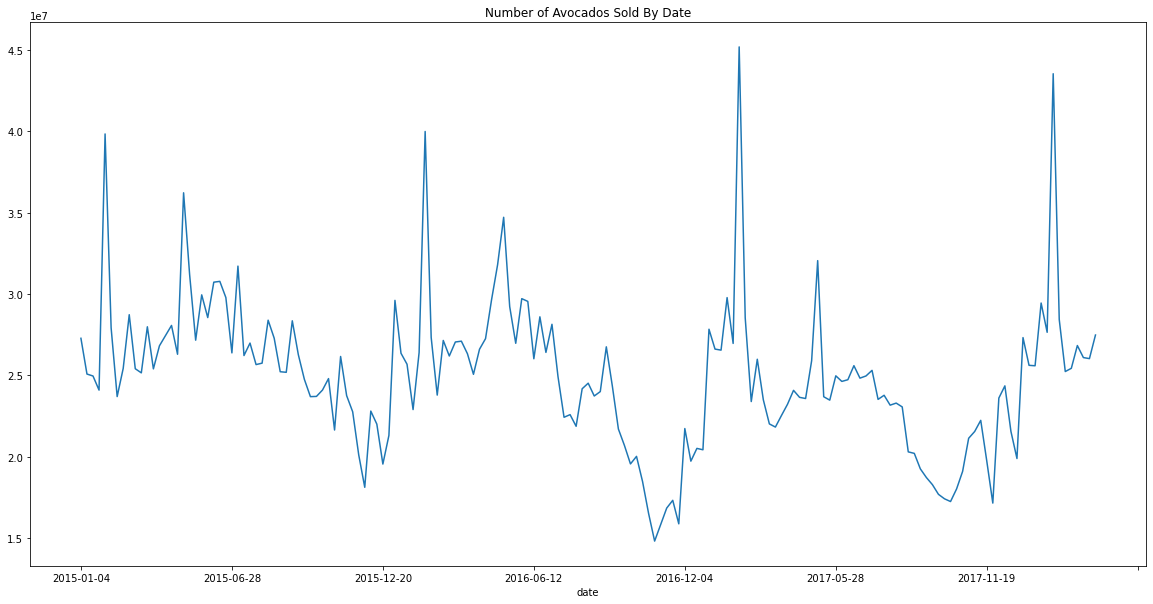

In [38]:
#Line Plot: Change of numerical values over time (time trend analysis)

import pickle
with open('avoplotto.pkl', 'rb') as f:
    avo = pickle.load(f)

# Print the head of the data.
print(avo.head())
#How many rows and columns in the data?
print(avo.shape)

# Get the total number of avocados sold on each date
gb = avo.groupby('date')['nb_sold'].sum()
print(gb)
# Create a line plot of the number of avocados sold by date
gb.plot(x = 'date', y = 'nb_sold', title = 'Number of Avocados Sold By Date', kind = 'line', figsize = (20,10))
# Show the plot
plt.show()